In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load an Excel file 
df=pd.read_excel("bankruptcy-prevention (1) (1).xlsx")
df

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


In [3]:
# splitting columns
columns=[]
for col in df.columns:
    columns.append(col.split(';'))

# splitting values
values=[]
for col in df.values:
    values.append(col[0].split(';'))

# removing extra spaces from column names
columns1=[]
for col in columns[0]:
    columns1.append(col.strip())


In [4]:
# creating new dataframe
new_df=pd.DataFrame(values,columns=columns1)
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   industrial_risk        250 non-null    object
 1   management_risk        250 non-null    object
 2   financial_flexibility  250 non-null    object
 3   credibility            250 non-null    object
 4   competitiveness        250 non-null    object
 5   operating_risk         250 non-null    object
 6   class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
# changing dtypes to float
for col in new_df.columns.drop('class'):
    new_df[col]=new_df[col].astype(float)

In [ ]:
# changing values
new_df=new_df.replace({'bankruptcy':1,'non-bankruptcy':0})
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB


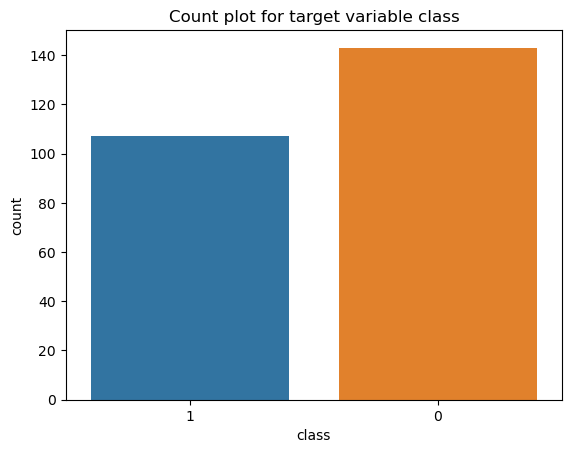

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'class' column to string type
new_df['class'] = new_df['class'].astype(str)

# Plot the count plot
sns.countplot(x='class', hue='class', data=new_df)
plt.title("Count plot for target variable class")
plt.show()

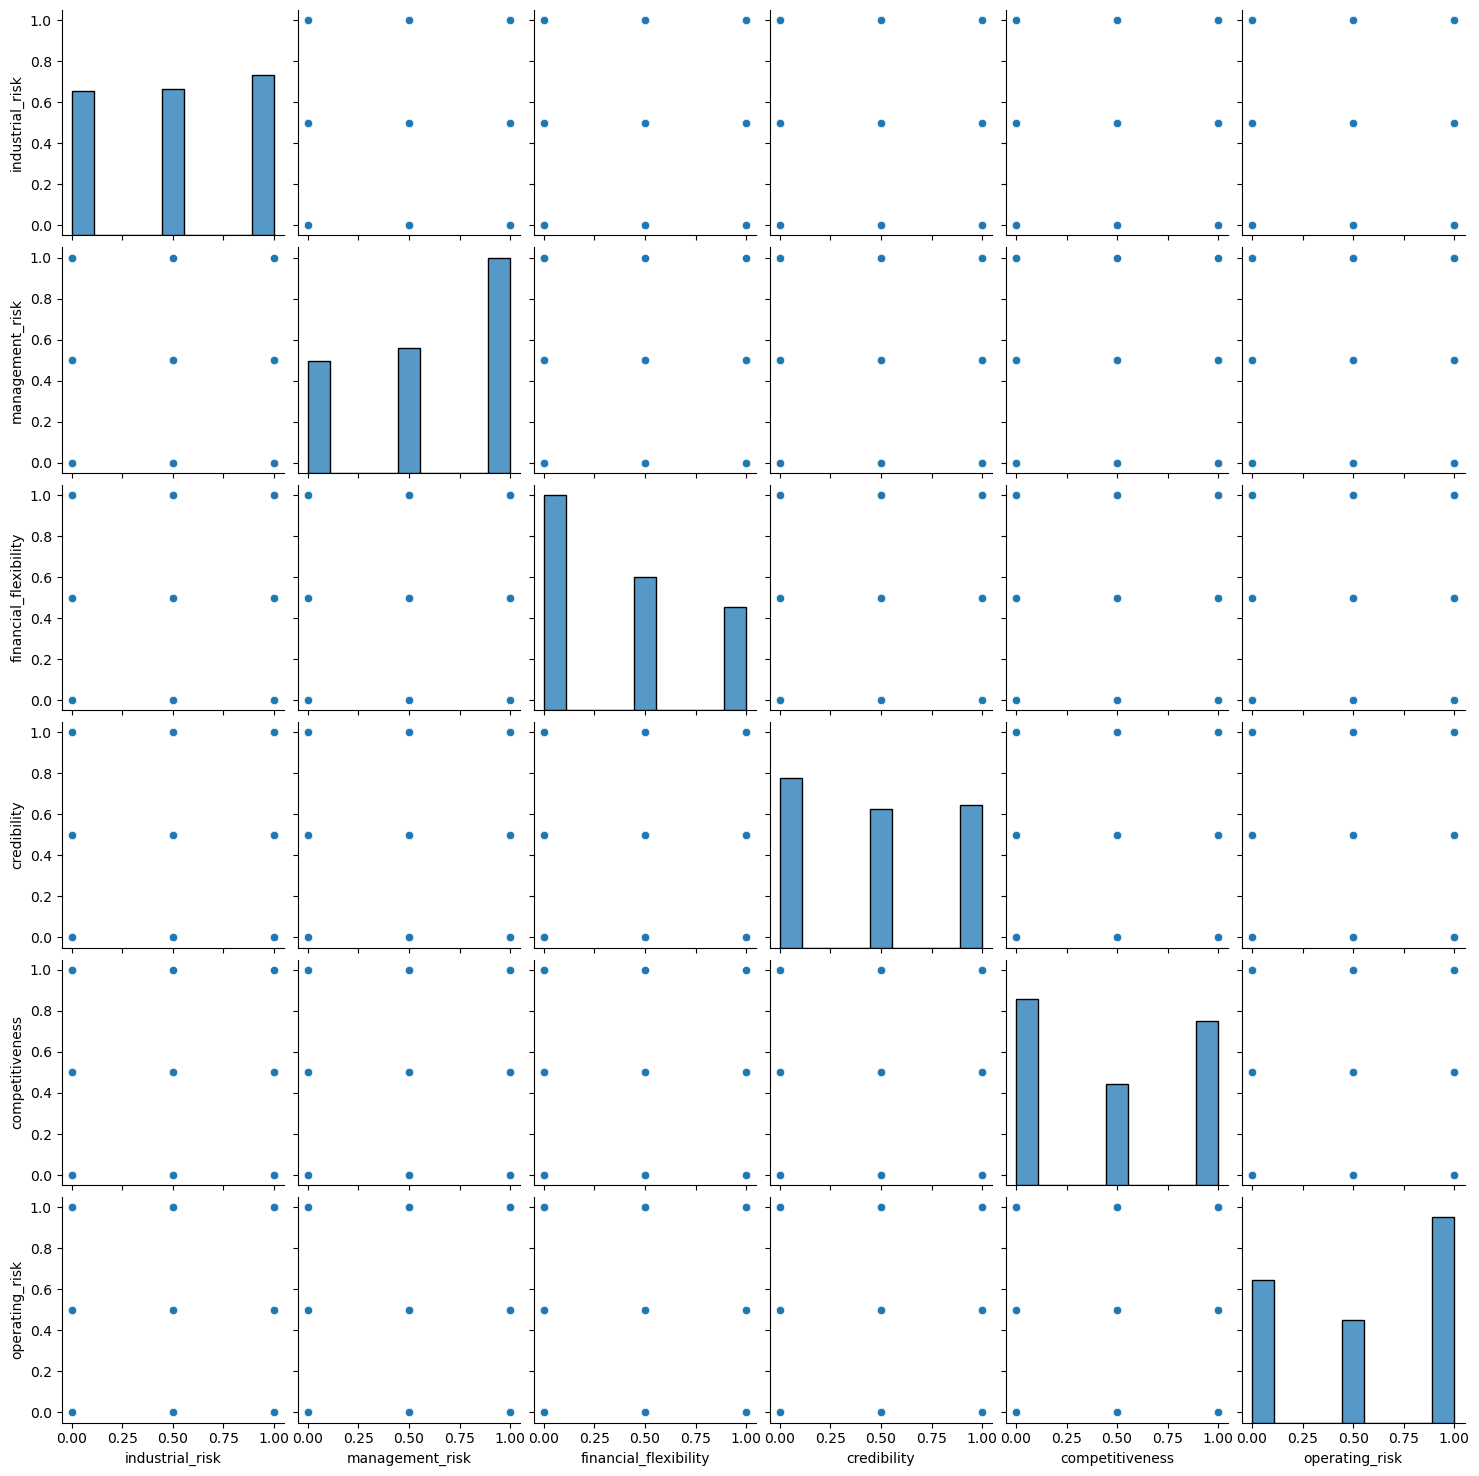

In [10]:
#Pairplot for to knowing the relaction between each column
sns.pairplot(data=new_df)

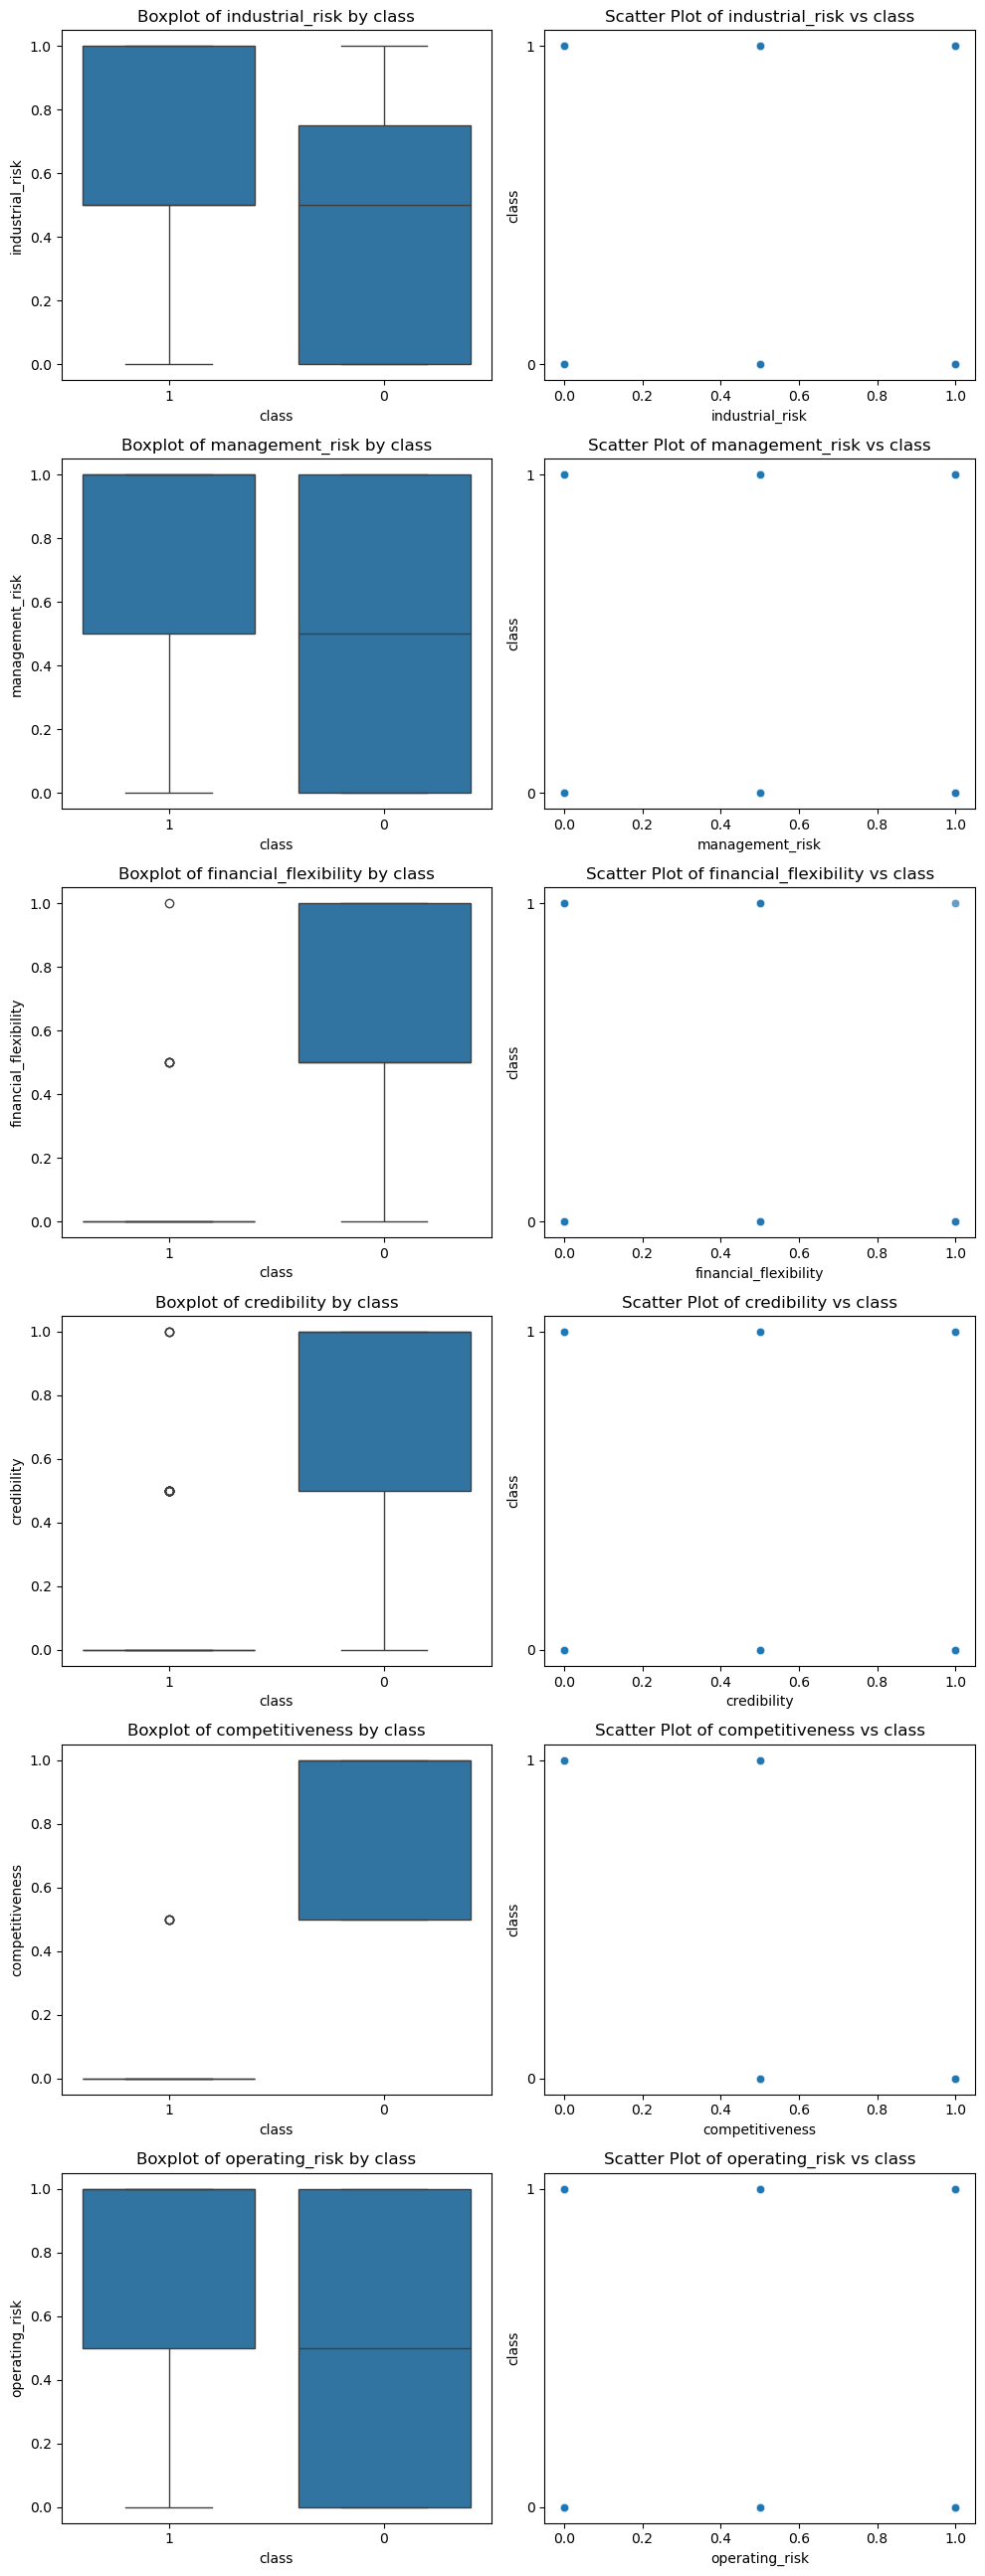

In [11]:



features=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']
target='class'

# Plotting boxplots and scatter plots using a for loop
plt.figure(figsize=(10, 26))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 2, 2 * i - 1)
    sns.boxplot(x=target, y=feature, data=new_df)
    plt.title(f"Boxplot of {feature} by {target}")
    plt.subplot(len(features), 2, 2 * i)
    sns.scatterplot(x=feature, y=target, data=new_df, alpha=0.7)
    plt.title(f"Scatter Plot of {feature} vs {target}")
plt.tight_layout()
plt.show()

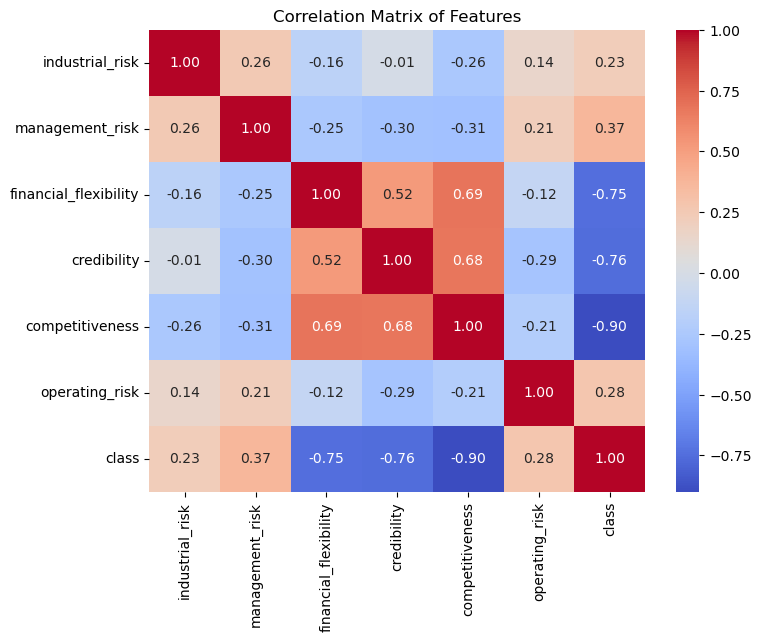

In [12]:

# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

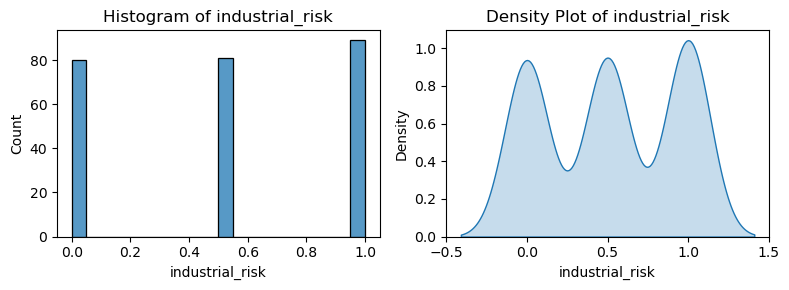

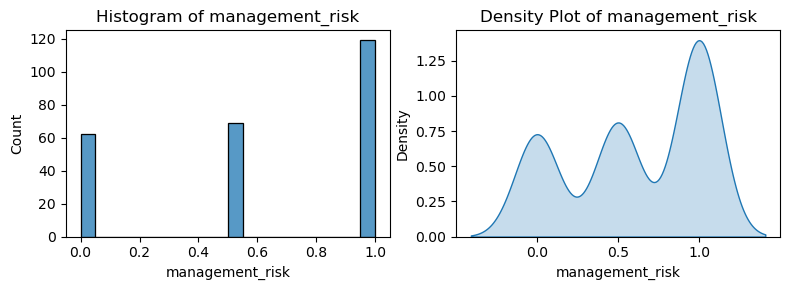

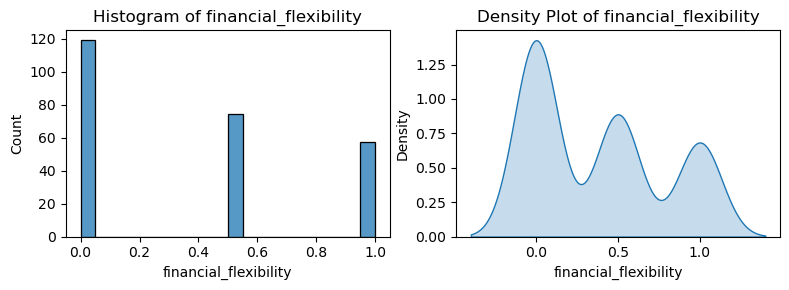

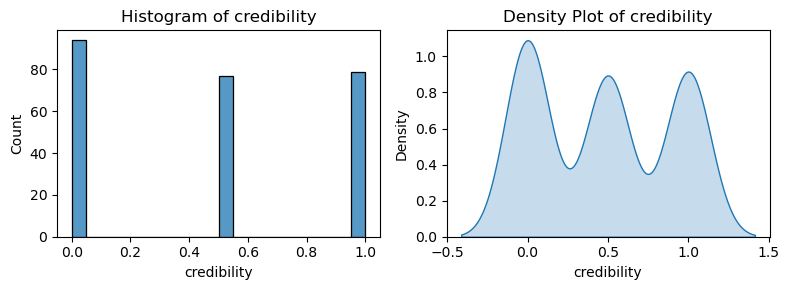

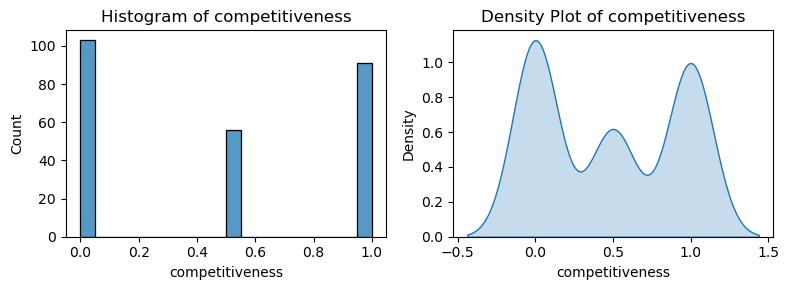

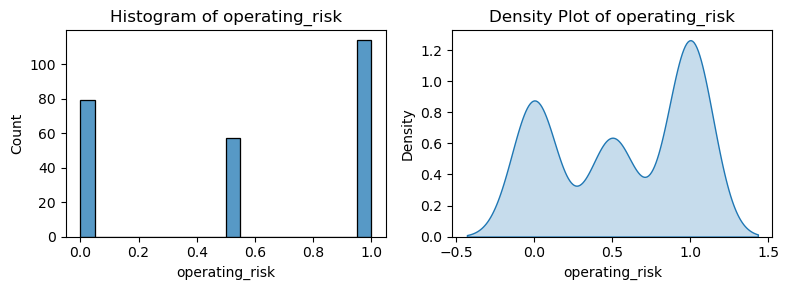

In [13]:

# Select numerical columns
num_columns = new_df.select_dtypes(include=['float', 'int']).columns
# Create subplots for each column
for col in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns
    # Histogram
    sns.histplot(new_df[col], bins=20, kde=False, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    # Density Plot
    sns.kdeplot(new_df[col], shade=True, ax=axes[1])
    axes[1].set_title(f'Density Plot of {col}')
    plt.tight_layout()
    plt.show()

#Standarding and spliting data into train and test sets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Ensure 'class' is numeric
new_df['class'] = new_df['class'].astype('category').cat.codes

# Define features (X) and target (y)
x = new_df.drop(columns=['class'])
y = np.log1p(new_df['class'])  # Safely apply log1p after ensuring numeric data

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Check shapes
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(175, 6) (75, 6) (175,) (75,)


#Linear Regression

In [15]:
# Initialize the performance dictionary
model_performance = {}

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
model_performance['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'Accuracy_score': r2_score(y_test, y_pred_lr)
}

In [17]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
model_performance['Decision Tree'] = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'Accuracy_score': r2_score(y_test, y_pred_dt)
}

In [18]:

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
model_performance['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'Accuracy_score': r2_score(y_test, y_pred_rf)
}

In [19]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)
model_performance['Support Vector Regressor'] = {
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'Accuracy_score': r2_score(y_test, y_pred_svr)
}

In [20]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(x_train, y_train)
y_pred_xg = xgb_model.predict(x_test)
model_performance['XG Boost'] = {
    'MAE': mean_absolute_error(y_test, y_pred_xg),
    'MSE': mean_squared_error(y_test, y_pred_xg),
    'Accuracy_score': r2_score(y_test, y_pred_xg)
}

In [21]:
# prompt: like this i need knn and neural network

from sklearn.neighbors import KNeighborsRegressor # Changed to Regressor
from sklearn.neural_network import MLPClassifier # Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
model_performance['KNN'] = {
    'MAE': mean_absolute_error(y_test, y_pred_knn),
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'Accuracy_score': r2_score(y_test, y_pred_knn)
}

# Neural Network - Assuming 'class' is binary (0 or 1)
'''nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) # Adjust parameters as needed
# Convert y_train and y_test back to original binary values for the Neural Network if it's a classification problem
y_train_binary = np.where(y_train > 0, 1, 0) 
y_test_binary = np.where(y_test > 0, 1, 0)
nn_model.fit(x_train, y_train_binary) # Using binary target for fitting
y_pred_nn = nn_model.predict(x_test)
model_performance['Neural Network'] = {
    'MAE': mean_absolute_error(y_test_binary, y_pred_nn), # Using binary target for evaluation
    'MSE': mean_squared_error(y_test_binary, y_pred_nn),
    'Accuracy_score': r2_score(y_test_binary, y_pred_nn)
}'''

# Print or further analyze the model performance
for model_name, metrics in model_performance.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

Linear Regression:
  MAE: 0.0924
  MSE: 0.0166
  Accuracy_score: 0.8446
Decision Tree:
  MAE: 0.0092
  MSE: 0.0064
  Accuracy_score: 0.9400
Random Forest:
  MAE: 0.0122
  MSE: 0.0048
  Accuracy_score: 0.9554
Support Vector Regressor:
  MAE: 0.0650
  MSE: 0.0070
  Accuracy_score: 0.9348
XG Boost:
  MAE: 0.0093
  MSE: 0.0064
  Accuracy_score: 0.9404
KNN:
  MAE: 0.0074
  MSE: 0.0041
  Accuracy_score: 0.9614


In [22]:
importances = xgb_model.feature_importances_
feature_names=new_df.columns
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.2f}")

industrial_risk: 0.00
management_risk: 0.00
financial_flexibility: 0.00
credibility: 0.07
competitiveness: 0.92
operating_risk: 0.00


In [23]:

# Print the model performance results
'''for model_name, metrics in model_performance.items():
    print(f"Model: {model_name}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R^2 Score: {metrics['Accuracy_score']:.4f}")
    print("-" * 20)'''

'for model_name, metrics in model_performance.items():\n    print(f"Model: {model_name}")\n    print(f"  MAE: {metrics[\'MAE\']:.4f}")\n    print(f"  MSE: {metrics[\'MSE\']:.4f}")\n    print(f"  R^2 Score: {metrics[\'Accuracy_score\']:.4f}")\n    print("-" * 20)'

In [24]:

# Create a DataFrame from the model_performance dictionary
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# Find the model with the highest R^2 score
best_model = performance_df['Accuracy_score'].idxmax()

print(f"The best performing model is: {best_model}")

The best performing model is: KNN


In [25]:

import joblib

# Saving xgb_model using joblib
model_file_name = "ruptcy_model.pkl"
try:
    joblib.dump(xgb_model, model_file_name)
    print(f"Model saved successfully to {model_file_name}")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully to ruptcy_model.pkl
